In this lab we discuss some tools for data visualization in Python.

# Import necessary Python libraries

**matplotlib.pyplot:** https://matplotlib.org/3.1.1/gallery/index.html

**Seaborn:** https://seaborn.pydata.org/examples/index.html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import percentile
%matplotlib inline

# Import the data

**pd.read_csv:** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [2]:
# Read .csv data
possum = pd.read_csv("possum.csv")
# The possum dataset consists of morphometric measurements on 46 possums.
# The head() function is used to get the first 5 rows.
possum.head()

,sex,age,headL,skullW,totalL,tailL
0,m,8,94.1,60.4,89.0,36.0
1,f,6,92.5,57.6,91.5,36.5
2,f,6,94.0,60.0,95.5,39.0
3,f,6,93.2,57.1,92.0,38.0
4,f,2,91.5,56.3,85.5,36.0


# Data visualization

## Line plots

**plt.plot:** https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html

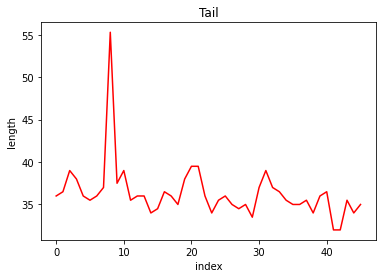

In [3]:
# Plotting tailL (tail length) versus index
plt.plot(possum["tailL"], color = "red")

# Adding title and labels
plt.title("Tail")
plt.xlabel("index")
plt.ylabel("length")
plt.show()

## Histograms

**plt.hist:** https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

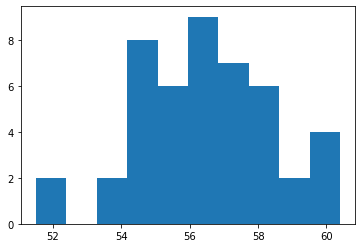

In [4]:
# Plotting the histogram for skullW (skull width)
# A histogram represents a frequency distribution by means of rectangles whose widths represent class intervals
# and whose areas are proportional to the corresponding frequencies.
plt.hist(possum['skullW'], bins = 10)
plt.show()

Doing the histogram using the library seaborn: sns.histplot: https://seaborn.pydata.org/generated/seaborn.histplot.html

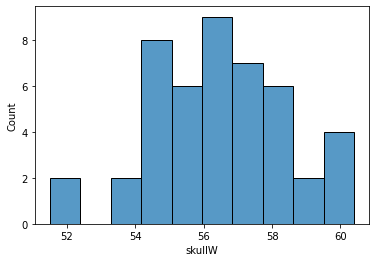

In [5]:
sns.histplot(data=possum, x="skullW",bins=10) # it looks much better!
plt.show()

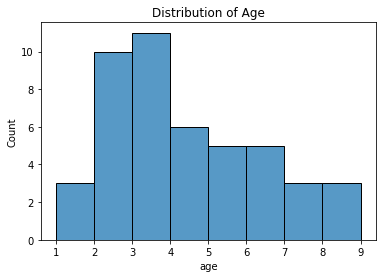

In [6]:
# Plotting the histogram/distribution for age
sns.histplot(data = possum["age"], binwidth = 1)
plt.title("Distribution of Age")
plt.xlabel("age")
plt.show()

## Boxplots

**sns.boxplot:** https://seaborn.pydata.org/generated/seaborn.boxplot.html

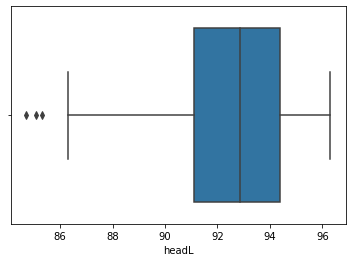

In [7]:
# Plotting the boxplot for headL (head length)
# A boxplot is a graph that gives you a good indication of how the values in the data are spread out.
sns.boxplot(x = possum["headL"])
plt.show()

# Five-number Summary 

In [8]:
# Obtaining the 5-number summary for headL (head length)
# The five-number summary is a set of descriptive statistics that provides information about a dataset.
# It consists of the five most important sample percentiles:
# 1. the sample minimum (smallest observation)
# 2. the lower quartile or first quartile
# 3. the median (the middle value)
# 4. the upper quartile or third quartile
# 5. the sample maximum (largest observation)
quartiles = percentile(possum["headL"], [25, 50, 75])
minimum = np.min(possum["headL"])
maximum = np.max(possum["headL"])
print('Min:', minimum)
print('Q1:', quartiles[0])
print('Median:', quartiles[1])
print('Q3:', quartiles[2])
print('Max:', maximum)

Min: 84.7
Q1: 91.1
Median: 92.85
Q3: 94.4
Max: 96.3


## Mean and standard deviation

In [9]:
# Obtaining the mean and standard deviation for headL (head length)
mean = np.mean(possum["headL"])
standard_devaiation = np.std(possum["headL"], ddof = 1)
print('Mean:', mean)
print('Standard Deviation', standard_devaiation)

Mean: 92.31086956521742
Standard Deviation 2.929332746234926


In [10]:
# Alternative way to get those numbers for headL (head length)
possum["headL"].describe()

count    46.000000
mean     92.310870
std       2.929333
min      84.700000
25%      91.100000
50%      92.850000
75%      94.400000
max      96.300000
Name: headL, dtype: float64

# Other Types of Plots - Bar Plots and Pie Charts

**plt.bar :** https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

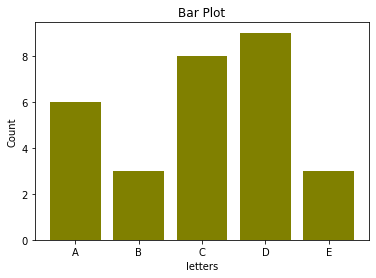

In [11]:
# Plotting a simple bar plot
# A bar plot is a plot that presents categorical data with rectangular bars
# with heights proportional to the values that they represent.
data = {'A':6, 'B':3, 'C':8, 'D':9, 'E':3}
letters = list(data.keys())
values = list(data.values())
plt.bar(letters, values, color = 'olive')
plt.xlabel('letters')
plt.ylabel('Count')
plt.title('Bar Plot')
plt.show()

In [12]:
# Getting back to the possum dataset
# The code below returns the unique values for age.
# unique() is used to find the unique elements of an array.
np.sort(possum["age"].unique())

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
# The code below returns the counts for each value of age.
# value_counts() returns a Series containing counts of unique values.
possum["age"].value_counts(sort = False)

1     3
2    10
3    11
4     6
5     5
6     5
7     3
8     1
9     2
Name: age, dtype: int64

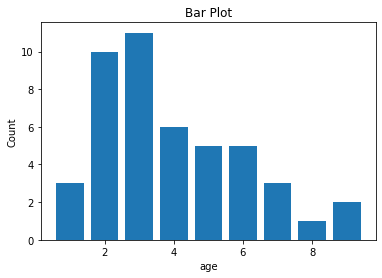

In [14]:
# Plotting the bar plot for age
plt.bar(np.sort(possum["age"].unique()), possum["age"].value_counts(sort = False))
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Bar Plot')
plt.show()

**plt.pie :** https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

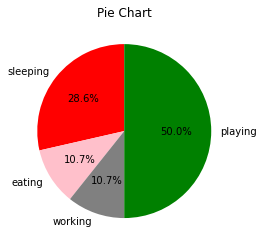

In [15]:
# Plotting the pie chart for different activities
# A pie chart is a circular statistical graphic which is divided into slices to illustrate numerical proportion.
sizes = [8, 3, 3, 14]
activities = ['sleeping', 'eating', 'working', 'playing']
colors = ['red', 'pink', 'gray', 'green']
plt.pie(sizes, labels = activities, colors = colors, startangle = 90, autopct = '%1.1f%%')
plt.title('Pie Chart')
plt.show()

In [16]:
# Getting back to the possum dataset
# The code below returns the unique values.
# unique() is used to find the unique elements of an array.
np.sort(possum["sex"].unique())

array(['f', 'm'], dtype=object)

In [17]:
# The code below returns the counts for each value.
# value_counts() returns a Series containing counts of unique values.
possum["sex"].value_counts(sort = True)

f    24
m    22
Name: sex, dtype: int64

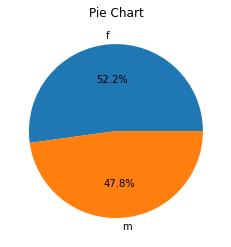

In [18]:
# Plotting the pie chart
plt.pie(possum["sex"].value_counts(sort = True), labels = np.sort(possum["sex"].unique()), autopct = '%1.1f%%')
plt.title('Pie Chart')
plt.show()